<a href="https://colab.research.google.com/github/Sahilgupta100/pw_skills_assignment/blob/main/edaassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Range of selling prices: Min = 5000, Max = 760000
2. Median selling price: 45000.0
3. Most common seller type: Individual
4. Bikes driven more than 50,000 km: 170
5. Average km_driven by ownership type:
 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64
6. Proportion of bikes from 2015 or older: 0.5664467483506126
7. Missing values trend:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
8. Highest ex-showroom price:
 name                 Harley-Davidson Street Bob
ex_showroom_price                     1278000.0
Name: 134, dtype: object
9. Total bikes by seller type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64
10. Relationship between selling_price and km_driven for first-owner bikes:
               selling_price  km_dr

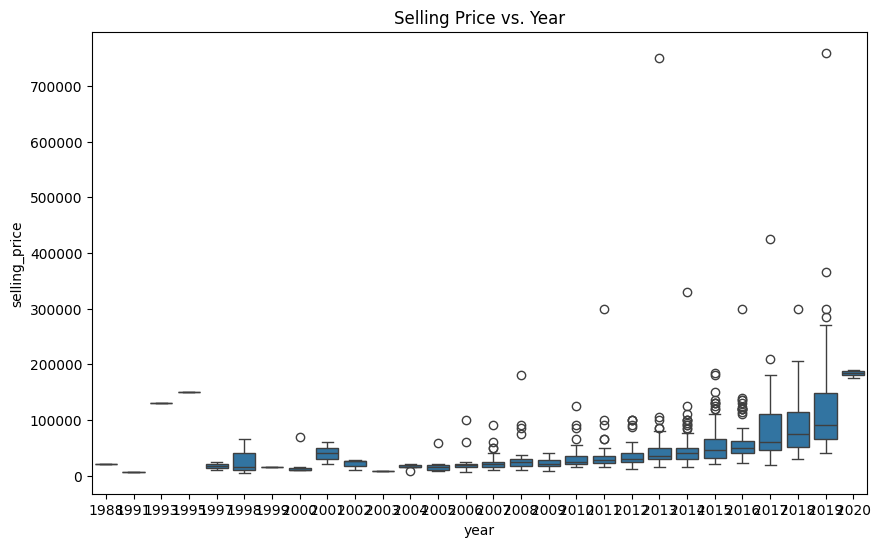

13. Average depreciation by bike age:
 bike_age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22306.082353
9     28328.190476
10    28013.275000
11    34505.606061
12    43086.886792
13    37317.648649
14    47102.666667
15    45658.928571
16    38227.785714
17    54732.428571
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
22             NaN
23             NaN
24    34852.000000
25             NaN
26             NaN
27             NaN
28             NaN
30             NaN
32             NaN
34             NaN
37             NaN
Name: depreciation, dtype: float64
14. Bikes priced significantly above average for their year:
 ['Yamaha YZF R3', 'Suzuki GSX S750', 'KTM RC 390', 'KTM RC 390', 'Kawasaki Ninja 650 [2018-2019]', 'BMW G310GS', 'Royal Enfield Classic Signals', 'Royal Enfield Thunderbird 500X', 'Royal Enfield Classic Gunmetal Grey', 'KTM 390 Duke', 'KTM 390 Duke ABS [2013-2016]', 'Royal Enfield Bullet 500', 'Royal Enfield Classic Deser

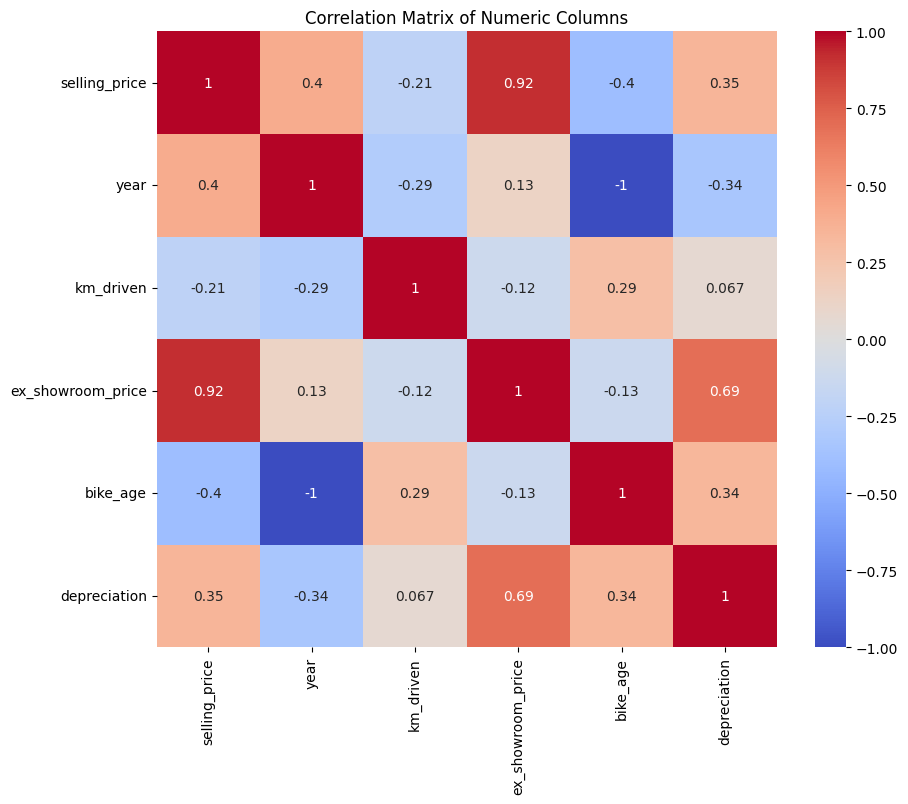

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import datetime


try:
    df_bike = pd.read_csv('BIKE DETAILS.csv')
except FileNotFoundError:
    print("Error: 'bike_details.csv' not found. Please make sure the file is in the correct directory.")
    exit()

# 1. What is the range of selling prices in the dataset?
price_range = df_bike['selling_price'].agg(['min', 'max'])
print(f"1. Range of selling prices: Min = {price_range['min']}, Max = {price_range['max']}")

# 2. What is the median selling price for bikes in the dataset?
median_price = df_bike['selling_price'].median()
print(f"2. Median selling price: {median_price}")

# 3. What is the most common seller type?
most_common_seller = df_bike['seller_type'].mode()[0]
print(f"3. Most common seller type: {most_common_seller}")

# 4. How many bikes have driven more than 50,000 kilometers?
bikes_above_50k = len(df_bike[df_bike['km_driven'] > 50000])
print(f"4. Bikes driven more than 50,000 km: {bikes_above_50k}")

# 5. What is the average km_driven value for each ownership type?
avg_km_by_owner = df_bike.groupby('owner')['km_driven'].mean()
print("5. Average km_driven by ownership type:\n", avg_km_by_owner)

# 6. What proportion of bikes are from the year 2015 or older?
proportion_2015_older = len(df_bike[df_bike['year'] <= 2015]) / len(df_bike)
print(f"6. Proportion of bikes from 2015 or older: {proportion_2015_older}")

# 7. What is the trend of missing values across the dataset?
missing_values = df_bike.isnull().sum()
print("7. Missing values trend:\n", missing_values)

# 8. What is the highest ex_showroom_price recorded, and for which bike?
highest_price_bike = df_bike.loc[df_bike['ex_showroom_price'].idxmax()]
print("8. Highest ex-showroom price:\n", highest_price_bike[['name', 'ex_showroom_price']])

# 9. What is the total number of bikes listed by each seller type?
seller_type_counts = df_bike['seller_type'].value_counts()
print("9. Total bikes by seller type:\n", seller_type_counts)

# 10. What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_data = df_bike[df_bike['owner'] == 'First Owner']  # Adjust if needed: 'Ist Owner' might be in dataset
print("10. Relationship between selling_price and km_driven for first-owner bikes:")
print(first_owner_data[['selling_price', 'km_driven']].corr())  # Calculate correlation

# 11. Identify and remove outliers in the km_driven column using the IQR method.
Q1 = df_bike['km_driven'].quantile(0.25)
Q3 = df_bike['km_driven'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
df_bike_no_outliers = df_bike[(df_bike['km_driven'] >= lower_bound) & (df_bike['km_driven'] <= upper_bound)]
print(f"11. Outliers removed. Original shape: {df_bike.shape}, New shape: {df_bike_no_outliers.shape}")

# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price.
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='selling_price', data=df_bike)
plt.title('Selling Price vs. Year')
plt.show()

# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
current_year = datetime.datetime.now().year  # Importing datetime
df_bike['bike_age'] = current_year - df_bike['year']
df_bike['depreciation'] = df_bike['ex_showroom_price'] - df_bike['selling_price']
avg_depreciation = df_bike.groupby('bike_age')['depreciation'].mean()
print("13. Average depreciation by bike age:\n", avg_depreciation)

# 14. Which bike names are priced significantly above the average price for their manufacturing year?
def find_expensive_bikes(df):
    expensive_bikes = []
    for year in df['year'].unique():
        year_df = df[df['year'] == year]
        avg_price = year_df['selling_price'].mean()
        std_price = year_df['selling_price'].std()
        threshold = avg_price + 1.96 * std_price  # 95% confidence interval
        expensive_bikes.extend(year_df[year_df['selling_price'] > threshold]['name'].tolist())
    return expensive_bikes

expensive_bikes = find_expensive_bikes(df_bike)
print("14. Bikes priced significantly above average for their year:\n", expensive_bikes)

# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_df = df_bike.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Load the dataset
df_car = None  # Initialize df_car outside the try block
try:
    # Option 1: Download from URL
    url = "https://drive.google.com/file/d/1N0kM_zi-iU3yvr6BEJf21aiF599PtA0U/view?usp=sharing"  # Corrected URL for direct download
    df_car = pd.read_csv(url)
    # Option 2: Upload file to Colab
    # uploaded = files.upload()
    # df_car = pd.read_csv(list(uploaded.keys())[0])  # Adjust filename if needed
except FileNotFoundError:
    print("Error: 'car_sales.csv' not found. Please provide the correct file or URL.")
    exit()
except Exception as e:
    print(f"Error loading car sales data: {e}")
    exit()

if df_car is None:  # Check if df_car is still None
    print("Failed to load the dataset. Exiting.")
    exit()

# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_price_by_dealer = df_car.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("1. Average selling price per dealer:\n", avg_price_by_dealer)

# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
price_variation_by_company = df_car.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("\n2. Price variation by company:\n", price_variation_by_company.head())

# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df_car)
plt.title('Price Distribution by Transmission Type')
plt.show()

# 4. What is the distribution of car prices across different regions?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df_car)
plt.title('Price Distribution by Region')
plt.show()

# 5. What is the distribution of cars based on body styles?
plt.figure(figsize=(8, 6))
sns.countplot(x='Body Style', data=df_car)
plt.title('Distribution of Body Styles')
plt.xticks(rotation=45)
plt.show()

# 6. How does the average selling price of cars vary by customer gender and annual income?
print("\n6. Average selling price by gender and annual income:")
print(df_car.groupby('Gender')[['Price ($)', 'Annual Income']].mean())

# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df_car)
plt.title('Price Distribution by Region')
plt.subplot(1, 2, 2)
sns.countplot(x='Dealer_Region', data=df_car)
plt.title('Number of Cars Sold by Region')
plt.show()

# 8. How does the average car price differ between cars with different engine sizes?
# Extract numeric part of 'Engine'
df_car['Engine_Num'] = df_car['Engine'].str.extract(r'(\d+)').astype(float) # Extracts the number.
avg_price_by_engine = df_car.groupby('Engine_Num')['Price ($)'].mean().sort_index()
print("\n8. Average car price by engine size:\n", avg_price_by_engine)

# 9. How do car prices vary based on the customer's annual income bracket?
df_car['Income_Bracket'] = pd.qcut(df_car['Annual Income'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High']) # Create income brackets.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Income_Bracket', y='Price ($)', data=df_car)
plt.title('Price Distribution by Income Bracket')
plt.show()

# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_5_models = df_car['Model'].value_counts().head(5).index
top_5_models_df = df_car[df_car['Model'].isin(top_5_models)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_5_models_df)
plt.title('Price Distribution of Top 5 Car Models')
plt.show()

# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Engine_Num', y='Price ($)', hue='Color', data=df_car)
plt.title('Car Price vs. Engine Size by Color')
plt.show()

price_variation_by_color = df_car.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("\n11. Price variation by color:\n", price_variation_by_color.head())

# 12. Is there any seasonal trend in car sales based on the date of sale?
# Convert 'Date' to datetime
df_car['Date'] = pd.to_datetime(df_car['Date'], format='%m/%d/%Y') # Use format that matches the data
df_car['Month'] = df_car['Date'].dt.month
monthly_sales = df_car.groupby('Month').size()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()

# 13. How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df_car)
plt.title('Price Distribution by Body Style and Transmission')
plt.xticks(rotation=45)
plt.show()

# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
correlation_matrix = df_car[['Price ($)', 'Engine_Num', 'Annual Income']].corr()
print("\n14. Correlation matrix:\n", correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 15. How does the average car price vary across different car models and engine types?
avg_price_by_model_engine = df_car.groupby(['Model', 'Engine_Num'])['Price ($)'].mean().unstack().fillna(0)
print("\n15. Average car price by model and engine type:\n", avg_price_by_model_engine)


Error loading car sales data: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2769

Failed to load the dataset. Exiting.


AttributeError: 'NoneType' object has no attribute 'groupby'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Load the dataset
try:
    df_amazon = pd.read_csv(amazon.csv)
except FileNotFoundError:
    print("Error: 'amazon_sales.csv' not found. Please provide the correct file or URL.")
    exit()
except Exception as e:
    print(f"Error loading amazon sales data: {e}")
    exit()

# 1. What is the average rating for each product category?
avg_rating_by_category = df_amazon.groupby('category')['rating'].mean().sort_values(ascending=False)
print("1. Average rating by category:\n", avg_rating_by_category)

# 2. What are the top rating_count products by category?
def top_products_by_category(df, n=5):
    top_products = df.groupby('category').apply(lambda x: x.nlargest(n, 'rating_count'))
    return top_products.reset_index(level=0, drop=True)

top_rated_products = top_products_by_category(df_amazon)
print("\n2. Top products by category:\n", top_rated_products[['category', 'product_name', 'rating_count']])

# 3. What is the distribution of discounted prices vs. actual prices?
plt.figure(figsize=(10, 6))
sns.histplot(data=df_amazon, x='discounted_price', label='Discounted Price', kde=True)
sns.histplot(data=df_amazon, x='actual_price', label='Actual Price', kde=True)
plt.title('Distribution of Discounted vs. Actual Prices')
plt.legend()
plt.show()

# 4. How does the average discount percentage vary across categories?
avg_discount_by_category = df_amazon.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print("\n4. Average discount percentage by category:\n", avg_discount_by_category)

# 5. What are the most popular product names?
popular_products = df_amazon['product_name'].value_counts().head(10)
print("\n5. Most popular product names:\n", popular_products)

# 6. What are the most popular product keywords?
from collections import Counter
import re

def extract_keywords(text):
    if isinstance(text, str):  # Check if it is a string
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        words = text.lower().split()
        return [word for word in words if word not in ['the', 'a', 'an', 'is', 'are', 'and', 'of', 'in', 'for', 'on', 'with']] # remove stop words
    else:
        return []

df_amazon['keywords'] = df_amazon['about_product'].apply(extract_keywords)
all_keywords = [word for sublist in df_amazon['keywords'] for word in sublist]
keyword_counts = Counter(all_keywords).most_common(20)
print("\n6. Most popular product keywords:\n", keyword_counts)

# 7. What are the most popular product reviews?
# Assuming 'review_title' or a combination of 'review_title' and 'review_content' represents the review.
df_amazon['full_review'] = df_amazon['review_title'].astype(str) + " " + df_amazon['review_content'].astype(str) # Combine and convert to string
popular_reviews = df_amazon['full_review'].value_counts().head(10)
print("\n7. Most popular product reviews:\n", popular_reviews)

# 8. What is the correlation between discounted_price and rating?
correlation = df_amazon['discounted_price'].corr(df_amazon['rating'])
print("\n8. Correlation between discounted price and rating:\n", correlation)

# 9. What are the Top 5 categories based on the highest ratings?
top_5_categories = avg_rating_by_category.head(5)
print("\n9. Top 5 categories based on highest ratings:\n", top_5_categories)

# 10. Identify any potential areas for improvement or optimization based on the data analysis.
print("\n10. Potential areas for improvement:\n")
print("- Categories with low average ratings need attention to improve product quality or customer satisfaction.")
print("- Products with low ratings but high discount percentages may indicate that the discount is not enough to offset negative customer experiences.")
print("- Analyze popular keywords to understand customer interests and potentially optimize product descriptions or marketing.")


Error loading amazon sales data: name 'amazon' is not defined


TypeError: agg function failed [how->mean,dtype->object]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Load the dataset
try:
    df_spotify = pd.read_csv(spotify.csv)
except FileNotFoundError:
    print("Error: 'spotify_hiphop.csv' not found. Please provide the correct file or URL.")
    exit()
except Exception as e:
    print(f"Error loading spotify data: {e}")
    exit()

# 1. Read the dataframe, check null value if present then do the needful, check duplicate row, if present then do the needful.
print("1. Dataframe information:")
print(df_spotify.info())

print("\nNull values before handling:")
print(df_spotify.isnull().sum())
#  Handle null values (if any).  For demonstration, I'll fill with the mean for numeric and mode for object.
for col in df_spotify.columns:
    if df_spotify[col].dtype in ['int64', 'float64']:
        df_spotify[col] = df_spotify[col].fillna(df_spotify[col].mean())
    elif df_spotify[col].dtype == 'object':
        df_spotify[col] = df_spotify[col].fillna(df_spotify[col].mode()[0])

print("\nNull values after handling:")
print(df_spotify.isnull().sum())

print("\nDuplicate rows before handling:", df_spotify.duplicated().sum())
df_spotify = df_spotify.drop_duplicates()
print("Duplicate rows after handling:", df_spotify.duplicated().sum())

# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
plt.figure(figsize=(8, 6))
sns.histplot(df_spotify['Popularity'], kde=True)
plt.title('Distribution of Track Popularity')
plt.show()

# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Popularity', y='Duration (ms)', data=df_spotify)
plt.title('Popularity vs. Duration')
plt.show()

# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
plt.figure(figsize=(10, 6))
sns.countplot(x='Artist', data=df_spotify, order=df_spotify['Artist'].value_counts().index)
plt.title('Track Count by Artist')
plt.xticks(rotation=45, ha='right')
plt.show()

# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
least_popular_tracks = df_spotify.sort_values('Popularity').head(5)
print("\n5. Top 5 least popular tracks:\n", least_popular_tracks[['Artist', 'Track Name', 'Popularity']])

# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.
top_5_artists = df_spotify['Artist'].value_counts().head(5).index
top_5_artists_df = df_spotify[df_spotify['Artist'].isin(top_5_artists)]
avg_popularity_by_artist = top_5_artists_df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print("\n6. Average popularity of top 5 artists:\n", avg_popularity_by_artist)

# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
def most_popular_tracks(df, artists):
    result = {}
    for artist in artists:
        artist_df = df[df['Artist'] == artist]
        most_popular_track = artist_df.sort_values('Popularity', ascending=False).iloc[0]['Track Name']
        result[artist] = most_popular_track
    return result

top_tracks_by_artist = most_popular_tracks(df_spotify, top_5_artists)
print("\n7. Most popular tracks for top 5 artists:\n", top_tracks_by_artist)

# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.
plt.figure(figsize=(10, 8))
sns.pairplot(df_spotify[['Popularity', 'Duration (ms)']]) # Add more columns if needed
plt.title('Pair Plot of Numerical Variables')
plt.show()

# 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df_spotify)
plt.title('Duration of Tracks by Artist')
plt.xticks(rotation=45, ha='right')
plt.show()

# 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=df_spotify)
plt.title('Popularity Distribution by Artist')
plt.xticks(rotation=45, ha='right')
plt.show()


Error loading spotify data: name 'spotify' is not defined
1. Dataframe information:


NameError: name 'df_spotify' is not defined